## Exploratory Data Analysis Template

by Harman Singh

### 0. Libraries and data

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# sns.get_dataset_names()

# Seaborn Datasets
anagrams = sns.load_dataset("anagrams")
anscombe = sns.load_dataset("anscombe")
attention = sns.load_dataset("attention")
brain_networks = sns.load_dataset("brain_networks")
car_crashes = sns.load_dataset("car_crashes")
diamonds = sns.load_dataset("diamonds")
dots = sns.load_dataset("dots")
dowjones = sns.load_dataset("dowjones")
exercise = sns.load_dataset("exercise")
flights = sns.load_dataset("flights")
fmri = sns.load_dataset("fmri")
geyser = sns.load_dataset("geyser")
glue = sns.load_dataset("glue")
healthexp = sns.load_dataset("healthexp")
iris = sns.load_dataset("iris")
mpg = sns.load_dataset("mpg")
penguins = sns.load_dataset("penguins")
planets = sns.load_dataset("planets")
seaice = sns.load_dataset("seaice")
taxis = sns.load_dataset("taxis")
tips = sns.load_dataset("tips")
titanic = sns.load_dataset("titanic")

# CSV datasets
melb_data = pd.read_csv("./datasets/melb_data.csv")

In [9]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

`SET DATASET`

In [10]:
dataset = penguins

### 01. General dataset information

In [11]:
dataset.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [13]:
dataset.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### 02. Basic Analysis

the stuff I knew by heart

#### **Missing Values**

c:\Users\Harman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Harman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Harman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


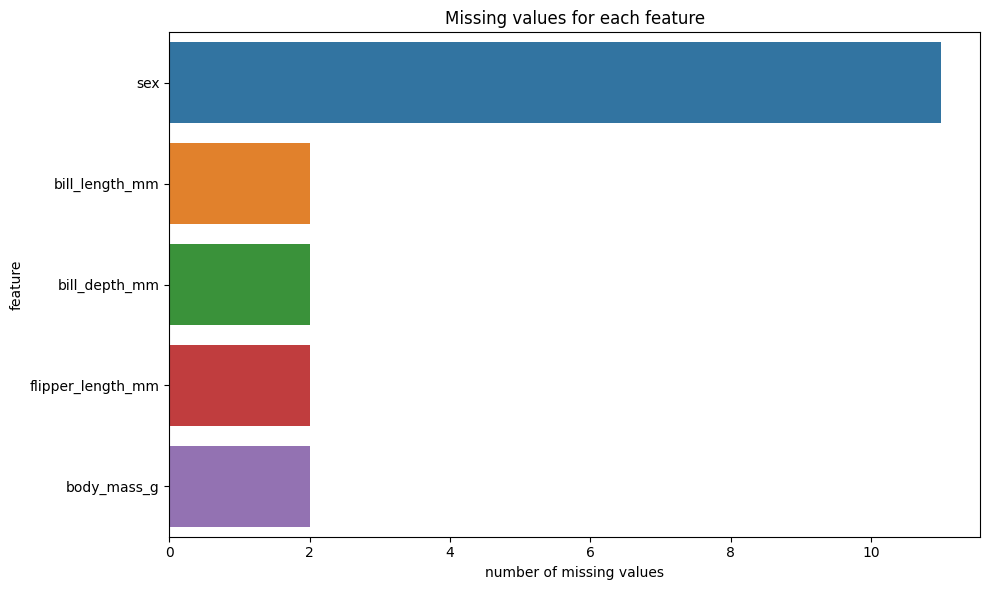

In [14]:
ONLY_SHOW_FEATURES_WITH_MISSING_VALUES = True

missing_values = dataset.isnull().sum()
missing_df = pd.DataFrame({'feature': missing_values.index, 'missing': missing_values.values}).reset_index(drop=True).sort_values(by="missing", ascending=False)

if (ONLY_SHOW_FEATURES_WITH_MISSING_VALUES):
    missing_df = missing_df[missing_df["missing"] > 0]

plt.figure(figsize=(10,6))

sns.barplot(missing_df, x="missing", y="feature")
plt.title("Missing values for each feature")
plt.xlabel("number of missing values")
plt.tight_layout()
plt.show()

#### **Correlation**

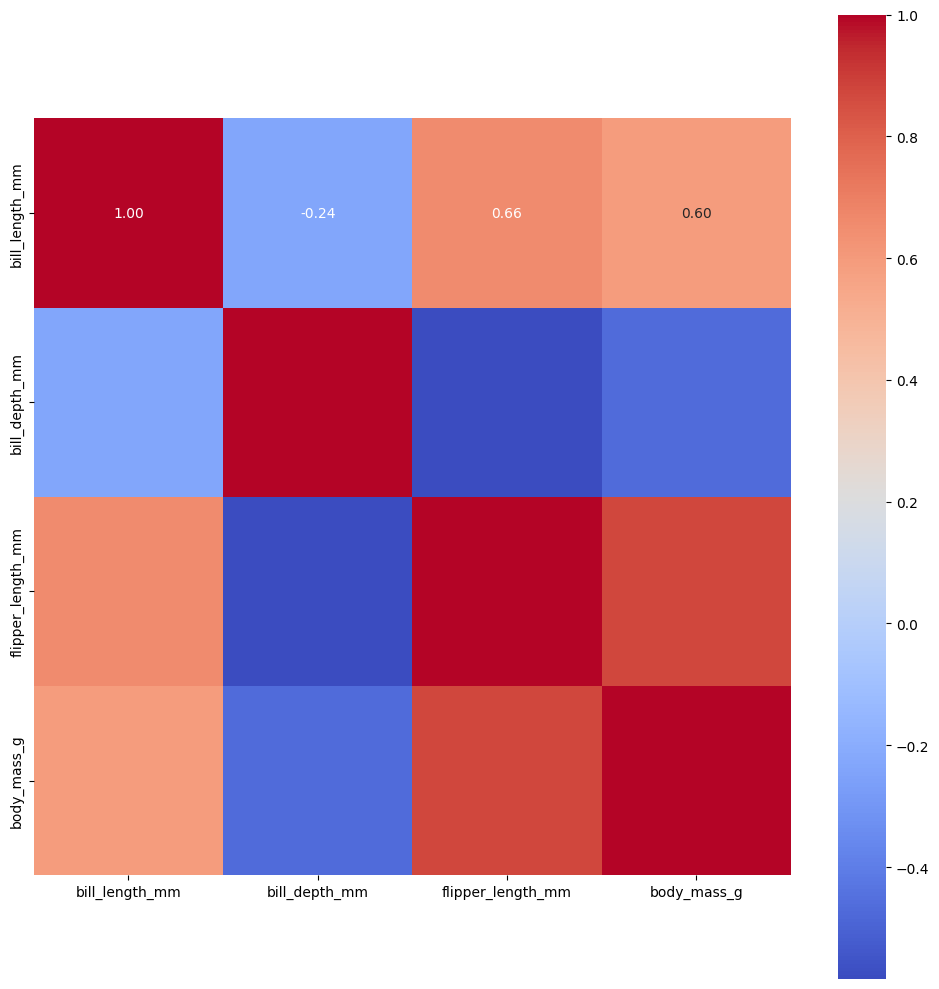

In [21]:
numerical_columns = dataset.select_dtypes(include="number")
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, square=True, fmt=".2f")
plt.tight_layout()
plt.show()

#### **Outliers**

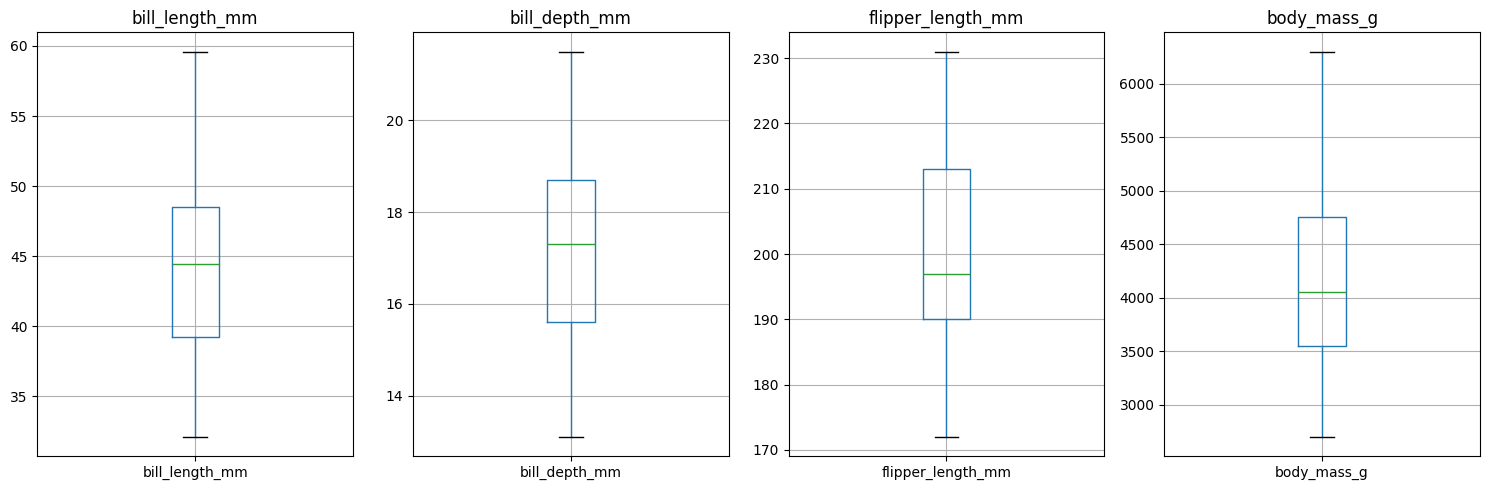

In [16]:
num_rows = len(numerical_columns.columns) // 4 + (len(numerical_columns.columns) % 4 > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(15, num_rows * 5))

axes = axes.flatten()

for i, column in enumerate(numerical_columns.columns):
    numerical_columns.boxplot(column=[column], ax=axes[i])
    axes[i].set_title(f"{column}")
plt.tight_layout()
plt.show()

### 02. Advanced Analysis

the stuff I had to ask ChatGPT

#### **Distribution Plots**

c:\Users\Harman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Harman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Harman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Harman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na 

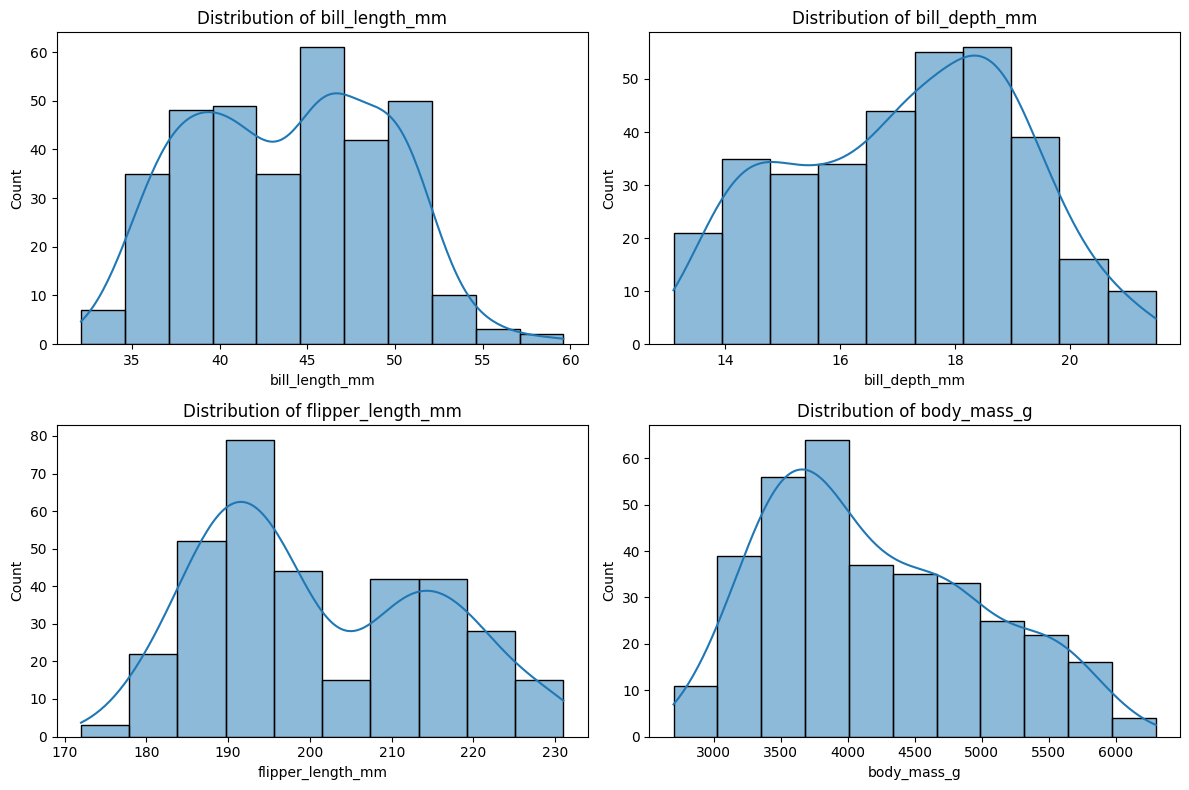

In [17]:
num_cols = len(numerical_columns.columns) // 2
num_rows = (num_cols + 1) // 2

fig, axes = plt.subplots(nrows=num_cols, ncols=2, figsize=(12, 4 * num_cols))

for i, col in enumerate(numerical_columns.columns):
    row_idx = i // 2
    col_idx = i % 2

    sns.histplot(numerical_columns[col], kde=True, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

#### **Categorical Data Exploration**

In [18]:
categorical_columns = dataset.select_dtypes(include='object')

c:\Users\Harman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Harman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Harman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Harman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

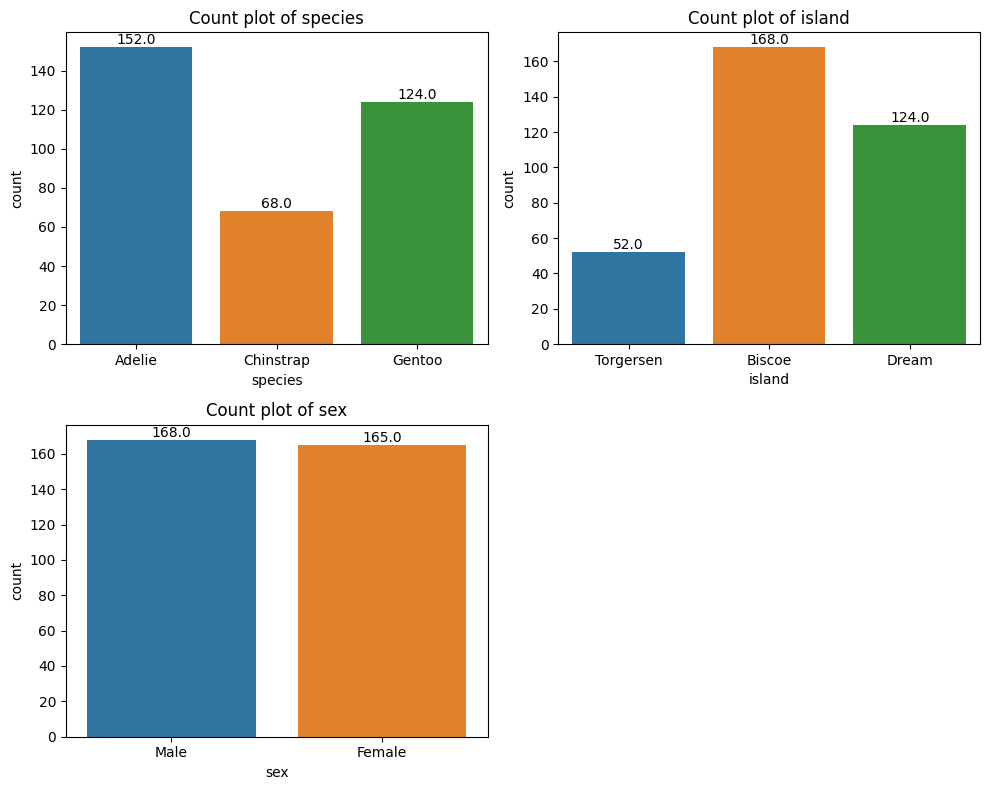

In [19]:
num_cols = len(categorical_columns.columns)
num_rows = (num_cols + 1) // 2

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, 4 * num_rows))

for i, col in enumerate(categorical_columns.columns):

    row_idx = i // 2
    col_idx = i % 2

    sns.countplot(x=col, data=categorical_columns, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Count plot of {col}')


    for p in axes[row_idx, col_idx].patches:
        axes[row_idx, col_idx].annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),  # offset of the text from the bar
                textcoords='offset points',
                # color="white"
            )


if num_cols % 2 // 1:
    fig.delaxes(axes[-1, -1])


plt.tight_layout()
plt.show()

#### **Pair Plots**

c:\Users\Harman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Harman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Harman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Harman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

<Figure size 1000x1000 with 0 Axes>

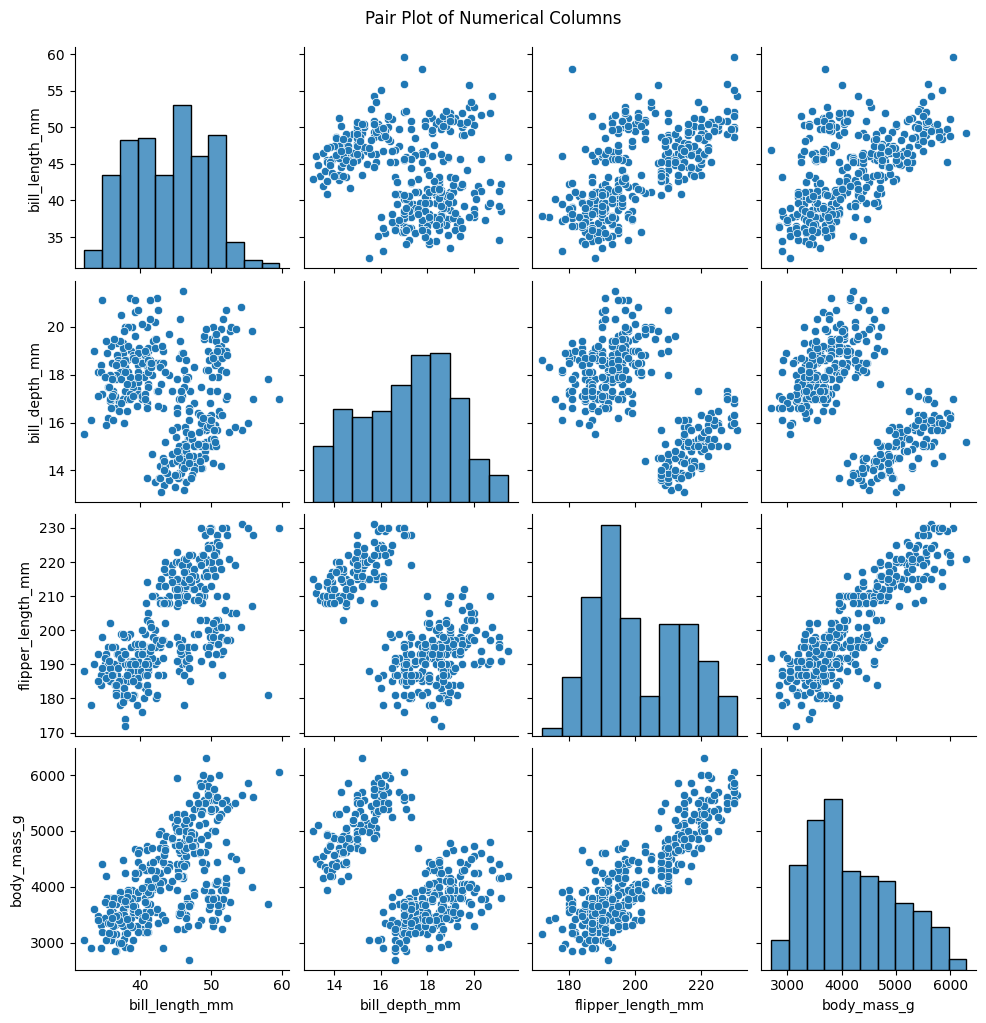

In [20]:
plt.figure(figsize=(10, 10))
sns.pairplot(numerical_columns)
plt.suptitle("Pair Plot of Numerical Columns", y=1.02)
plt.show()

# STOP (for now)

- Feature Relationships
    - Scatter Plots (already done)
    - Line Plots (there may not be a time series in the dataset, so it won't work on all datasets)
    - Box Plots (already done)
    - Heatmaps (already done)


- Target Variable Exploration
- Feature Engineering Opportunities
- Data Transformation
- Time Series Analysis
- Dimensionality Reduction
- Advanced Statistical Analysis
- Machine Learning Model Exploration
- Interactive Visualizations
